<a href="https://colab.research.google.com/github/l1f21bsee0018/DEEP-LEARNING/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size=2, hidden1_size=2, hidden2_size=2, output_size=2):
        # Initialize parameters
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size

        # Initialize weights and biases with random values
        self.W1 = np.random.randn(self.input_size, self.hidden1_size)
        self.b1 = np.zeros((1, self.hidden1_size))
        self.W2 = np.random.randn(self.hidden1_size, self.hidden2_size)
        self.b2 = np.zeros((1, self.hidden2_size))
        self.W3 = np.random.randn(self.hidden2_size, self.output_size)
        self.b3 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        # Hidden layer 1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Hidden layer 2
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        # Output layer
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        return self.a3

    def compute_error(self, y, output):
        # Using mean squared error
        return np.mean((y - output) ** 2)

    def backward_propagation(self, X, y, output, alpha):
        # Calculate output layer delta
        delta3 = (output - y) * self.sigmoid_derivative(output)

        # Calculate hidden layer 2 delta
        delta2 = np.dot(delta3, self.W3.T) * self.sigmoid_derivative(self.a2)

        # Calculate hidden layer 1 delta
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W3 -= alpha * np.dot(self.a2.T, delta3)
        self.b3 -= alpha * np.sum(delta3, axis=0, keepdims=True)
        self.W2 -= alpha * np.dot(self.a1.T, delta2)
        self.b2 -= alpha * np.sum(delta2, axis=0, keepdims=True)
        self.W1 -= alpha * np.dot(X.T, delta1)
        self.b1 -= alpha * np.sum(delta1, axis=0, keepdims=True)

        return delta1, delta2, delta3

    def train(self, X, y, epochs=1000, alpha=0.1, verbose=True):
        errors = []

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Compute error
            error = self.compute_error(y, output)
            errors.append(error)

            # Backward propagation
            deltas = self.backward_propagation(X, y, output, alpha)

            if verbose and epoch % (epochs//10) == 0:
                print(f"\nEpoch {epoch}:")
                print(f"Error: {error:.6f}")
                print("Activations:")
                print(f"a1: {self.a1}")
                print(f"a2: {self.a2}")
                print(f"Output: {output}")
                print("Deltas:")
                print(f"delta1: {deltas[0]}")
                print(f"delta2: {deltas[1]}")
                print(f"delta3: {deltas[2]}")
                print("Updated Weights:")
                print(f"W1: {self.W1}")
                print(f"W2: {self.W2}")
                print(f"W3: {self.W3}")
                print("Updated Biases:")
                print(f"b1: {self.b1}")
                print(f"b2: {self.b2}")
                print(f"b3: {self.b3}")

        return errors

In [ ]:
# Define input and target output

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([[0, 0], [1, 0], [1, 0], [0, 1]])  # Target output (R)

In [ ]:
# Create neural network with S2222 configuration
nn = NeuralNetwork(input_size=2, hidden1_size=2, hidden2_size=2, output_size=2)

# Train the network
errors = nn.train(X, y, epochs=10000, alpha=0.1, verbose=True)


Epoch 0:
Error: 0.246871
Activations:
a1: [[0.5        0.5       ]
 [0.4024168  0.66317887]
 [0.1365434  0.35839311]
 [0.09624108 0.52376892]]
a2: [[0.3788708  0.386399  ]
 [0.39269804 0.36252646]
 [0.4582398  0.4280492 ]
 [0.46066834 0.40031882]]
Output: [[0.52943295 0.48555391]
 [0.52981206 0.48217113]
 [0.53486418 0.4795757 ]
 [0.53450198 0.47721332]]
Deltas:
delta1: [[ 0.00070343 -0.00180629]
 [ 0.0037231  -0.00040654]
 [ 0.00188197 -0.00045665]
 [-0.00154817  0.00047578]]
delta2: [[-0.0057814   0.01094921]
 [-0.01980295  0.0063969 ]
 [-0.02045201  0.00675072]
 [ 0.02270844 -0.00709178]]
delta3: [[ 0.13189959  0.12128715]
 [-0.1171291   0.12038951]
 [-0.11571858  0.11969387]
 [ 0.13298923 -0.13042522]]
Updated Weights:
W1: [[-1.84433451 -0.58234726]
 [-0.39562266  0.67748582]]
W2: [[-0.84135178 -0.18870555]
 [-0.14504331 -0.73791415]]
W3: [[ 0.235222   -0.46848732]
 [ 0.07198483  0.29219103]]
Updated Biases:
b1: [[-0.00047603  0.00021937]]
b2: [[ 0.00233279 -0.00170051]]
b3: [[-0.

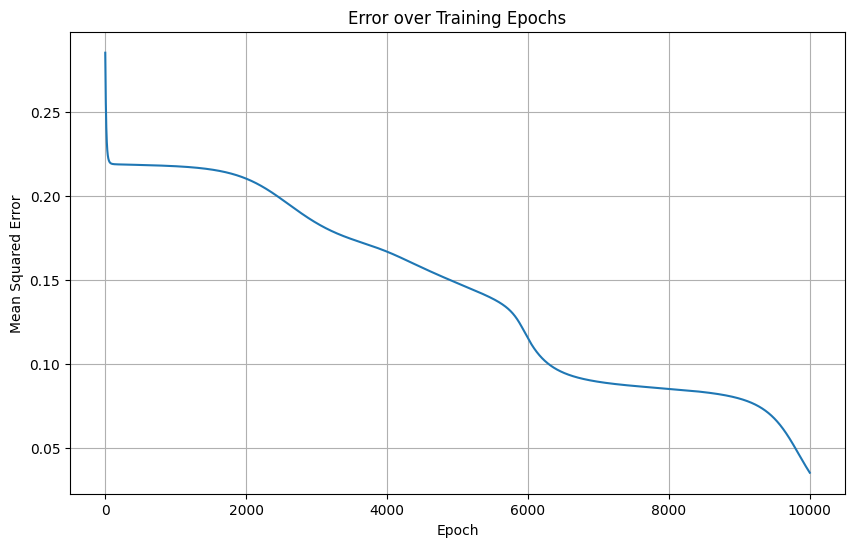

In [ ]:
# Visualize error over epochs
plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.title("Error over Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

In [ ]:
# Test the trained network
print("\nFinal Predictions:")
for i in range(len(X)):
    prediction = nn.forward_propagation(X[i:i+1])
    print(f"Input: {X[i]}, Predicted: {prediction[0]}, Target: {y[i]}")


Final Predictions:
Input: [0 0], Predicted: [0.10697501 0.03130391], Target: [0 0]
Input: [0 1], Predicted: [0.91582171 0.03125497], Target: [1 0]
Input: [1 0], Predicted: [0.91794731 0.03094808], Target: [1 0]
Input: [1 1], Predicted: [0.07604954 0.95735539], Target: [0 1]
